<a href="https://colab.research.google.com/github/raghav1674/Mask-R-CNN/blob/master/CIFAR-10-DATASET-CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from keras.datasets import cifar10

Using TensorFlow backend.


In [3]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

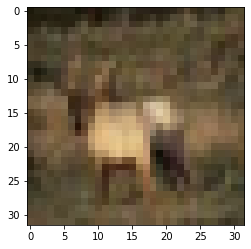

In [4]:
plt.imshow(x_train[3
                   ])

In [5]:
x_train.shape

(50000, 32, 32, 3)

In [6]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [7]:
from keras.utils import to_categorical
y_cat_train=to_categorical(y_train,10)
y_cat_test=to_categorical(y_test,10)

In [8]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [9]:
y_train[0]

array([6], dtype=uint8)

In [10]:
from keras.models import Sequential


In [11]:
from keras.layers import Dense,Dropout,Conv2D,MaxPool2D,Flatten

In [12]:
model=Sequential()

In [13]:
model.add(Conv2D(filters=32,kernel_size=(3,3),strides=(1,1),input_shape=(x_train.shape[1],x_train.shape[2],x_train.shape[3]),activation='relu'))

In [14]:
model.add(MaxPool2D(pool_size=(2,2)))

In [15]:
model.add(Conv2D(filters=32,kernel_size=(3,3),strides=(1,1),activation='relu'))

In [16]:
model.add(MaxPool2D(pool_size=(2,2)))

In [17]:
model.add(Flatten())

In [18]:
model.add(Dense(units=300,activation='relu'))


In [19]:
model.add(Dropout(0.2))
model.add(Dense(units=240,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=170,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=80,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=10,activation="softmax"))


In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 300)               345900    
_________________________________________________________________
dropout_1 (Dropout)          (None, 300)              

In [21]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 300)               345900    
_________________________________________________________________
dropout_1 (Dropout)          (None, 300)              

In [23]:
from keras.callbacks import EarlyStopping


In [24]:
early_stop=EarlyStopping(monitor='val_loss',mode='min',patience=2)

In [25]:
model.fit(x_train,y_cat_train,validation_data=(x_test,y_cat_test),epochs=150,callbacks=[early_stop])

Train on 50000 samples, validate on 10000 samples
Epoch 1/150
50000/50000 [==============================] - 11s 227us/step - loss: 2.1082 - accuracy: 0.2403 - val_loss: 1.6935 - val_accuracy: 0.3632
Epoch 2/150
50000/50000 [==============================] - 10s 192us/step - loss: 1.6535 - accuracy: 0.3941 - val_loss: 1.5269 - val_accuracy: 0.4573
Epoch 3/150
50000/50000 [==============================] - 10s 193us/step - loss: 1.4883 - accuracy: 0.4730 - val_loss: 1.3675 - val_accuracy: 0.5231
Epoch 4/150
50000/50000 [==============================] - 10s 194us/step - loss: 1.3748 - accuracy: 0.5195 - val_loss: 1.3370 - val_accuracy: 0.5333
Epoch 5/150
50000/50000 [==============================] - 10s 190us/step - loss: 1.2858 - accuracy: 0.5542 - val_loss: 1.2590 - val_accuracy: 0.5640
Epoch 6/150
50000/50000 [==============================] - 10s 191us/step - loss: 1.2108 - accuracy: 0.5874 - val_loss: 1.2151 - val_accuracy: 0.5824
Epoch 7/150
50000/50000 [=========================

In [26]:
metric=pd.DataFrame(model.history.history)

In [27]:
metric

,val_loss,val_accuracy,loss,accuracy
0,1.693520,0.3632,2.108182,0.24034
1,1.526897,0.4573,1.653486,0.39414
2,1.367518,0.5231,1.488290,0.47302
3,1.336975,0.5333,1.374824,0.51948
4,1.259043,0.5640,1.285822,0.55416
5,1.215138,0.5824,1.210810,0.58738
6,1.168534,0.5979,1.136189,0.61314
7,1.106947,0.6160,1.093740,0.63086
8,1.131871,0.6184,1.031345,0.65442
9,1.132735,0.6221,0.986863,0.66940


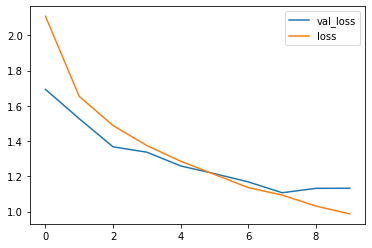

In [28]:
metric[["val_loss","loss"]].plot()

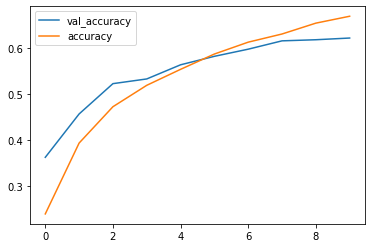

In [29]:
metric[["val_accuracy","accuracy"]].plot()

In [30]:
model.evaluate(x_test,y_cat_test)

10000/10000 [==============================] - 1s 78us/step


[1.1327350543022157, 0.6220999956130981]

In [31]:
predictions=model.predict_classes(x_test)

In [48]:
predictions.ndim,y_test.reshape(-1,).ndim

(1, 1)

In [51]:
from sklearn.metrics import confusion_matrix,classification_report
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.73      0.62      0.67      1000\n           1       0.75      0.81      0.78      1000\n           2       0.61      0.38      0.46      1000\n           3       0.34      0.59      0.43      1000\n           4       0.51      0.62      0.56      1000\n           5       0.70      0.31      0.43      1000\n           6       0.62      0.84      0.71      1000\n           7       0.75      0.65      0.70      1000\n           8       0.81      0.73      0.77      1000\n           9       0.72      0.67      0.70      1000\n\n    accuracy                           0.62     10000\n   macro avg       0.65      0.62      0.62     10000\nweighted avg       0.65      0.62      0.62     10000\n'

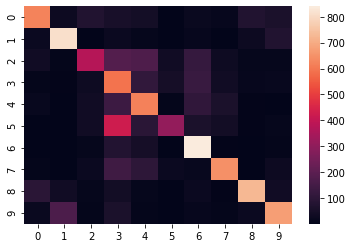

In [53]:
sns.heatmap(confusion_matrix(y_test,predictions))

In [54]:
x_test[0]

array([[[158, 112,  49],
        [159, 111,  47],
        [165, 116,  51],
        ...,
        [137,  95,  36],
        [126,  91,  36],
        [116,  85,  33]],

       [[152, 112,  51],
        [151, 110,  40],
        [159, 114,  45],
        ...,
        [136,  95,  31],
        [125,  91,  32],
        [119,  88,  34]],

       [[151, 110,  47],
        [151, 109,  33],
        [158, 111,  36],
        ...,
        [139,  98,  34],
        [130,  95,  34],
        [120,  89,  33]],

       ...,

       [[ 68, 124, 177],
        [ 42, 100, 148],
        [ 31,  88, 137],
        ...,
        [ 38,  97, 146],
        [ 13,  64, 108],
        [ 40,  85, 127]],

       [[ 61, 116, 168],
        [ 49, 102, 148],
        [ 35,  85, 132],
        ...,
        [ 26,  82, 130],
        [ 29,  82, 126],
        [ 20,  64, 107]],

       [[ 54, 107, 160],
        [ 56, 105, 149],
        [ 45,  89, 132],
        ...,
        [ 24,  77, 124],
        [ 34,  84, 129],
        [ 21,  67, 110]]

In [61]:
y_test[90]

array([0])

In [62]:
model.predict_classes(x_test[90].reshape(1,32,32,3))

array([0])